# Linear Regression

In this notebook I will be applying what I have learnt about Maximum Likelihood Estimation and its most common application: Linear Regression. Linear Regression is used to estimate the linear relationship between variables, in this notebook I will be focusing on simple linear regression, where we have one independent variable and one dependent variable. 

## Maximum Likelihood Estimation

In Machine Learning we will often use a model to describe the process that results in the data observed. For example, we may use a linear model to predict the revenue that will be generated for a company depending on how much they spend on advertising, or we may use a random forest model to classify whether customers may cancel a subscription from a service. Each model contains its own set of parameters that ultimately defines what the model looks like. 

For a linear model: y = mx+c, m (gradient) and c (y intercept) are the parameters for the model and different values will give different lines. 

It is only when specific values are chosen for the parameters that we get an instantiation for the model that describes given observations. Maximum Likelihood estimation is a method of determining values for these parameters, the values are found such that they maximize the likelihood that the process described by the model produced the observed data. 

Imagine we have ten data points, and assume that the data generation process can be described by a Gaussian distribution. A Gaussian distribution has two parameters: the mean and the standard deviation, different values for these parameters results in different curves. We want to know which curve was most likely responsible for creating the data points we observed? MLE is therefore used to estimate the values of the mean and standard deviation for the Gaussian distribution that best fits our ten data points.

## Linear Regression 

### Importing the libraries: 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import ipywidgets as widgets
from ipywidgets import interact_manual, fixed



In [2]:
df = pd.read_csv("/kaggle/input/dataset-1/DataForTable2.1.csv")

# renaming columns to remove spaces
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})

# drop all rows with empty values to improve fitting
df = df.dropna()

df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


The columns can be described as follows: \
`country_name` : Name of the country the data was taken from. \
`year` : the year the data was taken. \
`life_ladder` : The national average response to the question of life evaluations. The wording of the question is: "Imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top represents the best possible life for you and the bottom represents the worst possible life for you. On which step would you say you personally stand at this point in time?"\
`log_gdp_per_capita`: \
`social_support`: \
`healthy_life_expectancy_at_birth` : \
`freedom_to_make_life_choices` : \
`generosity` : \
`perceptions_of_corruption` : \
`positive_affect` : \
`negative_affect` : 

### Visualising the data 

I am going to use the Seaborn `pairplot` to visualise the data and plot the scatter plots between each pair of columns in the dataframe. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

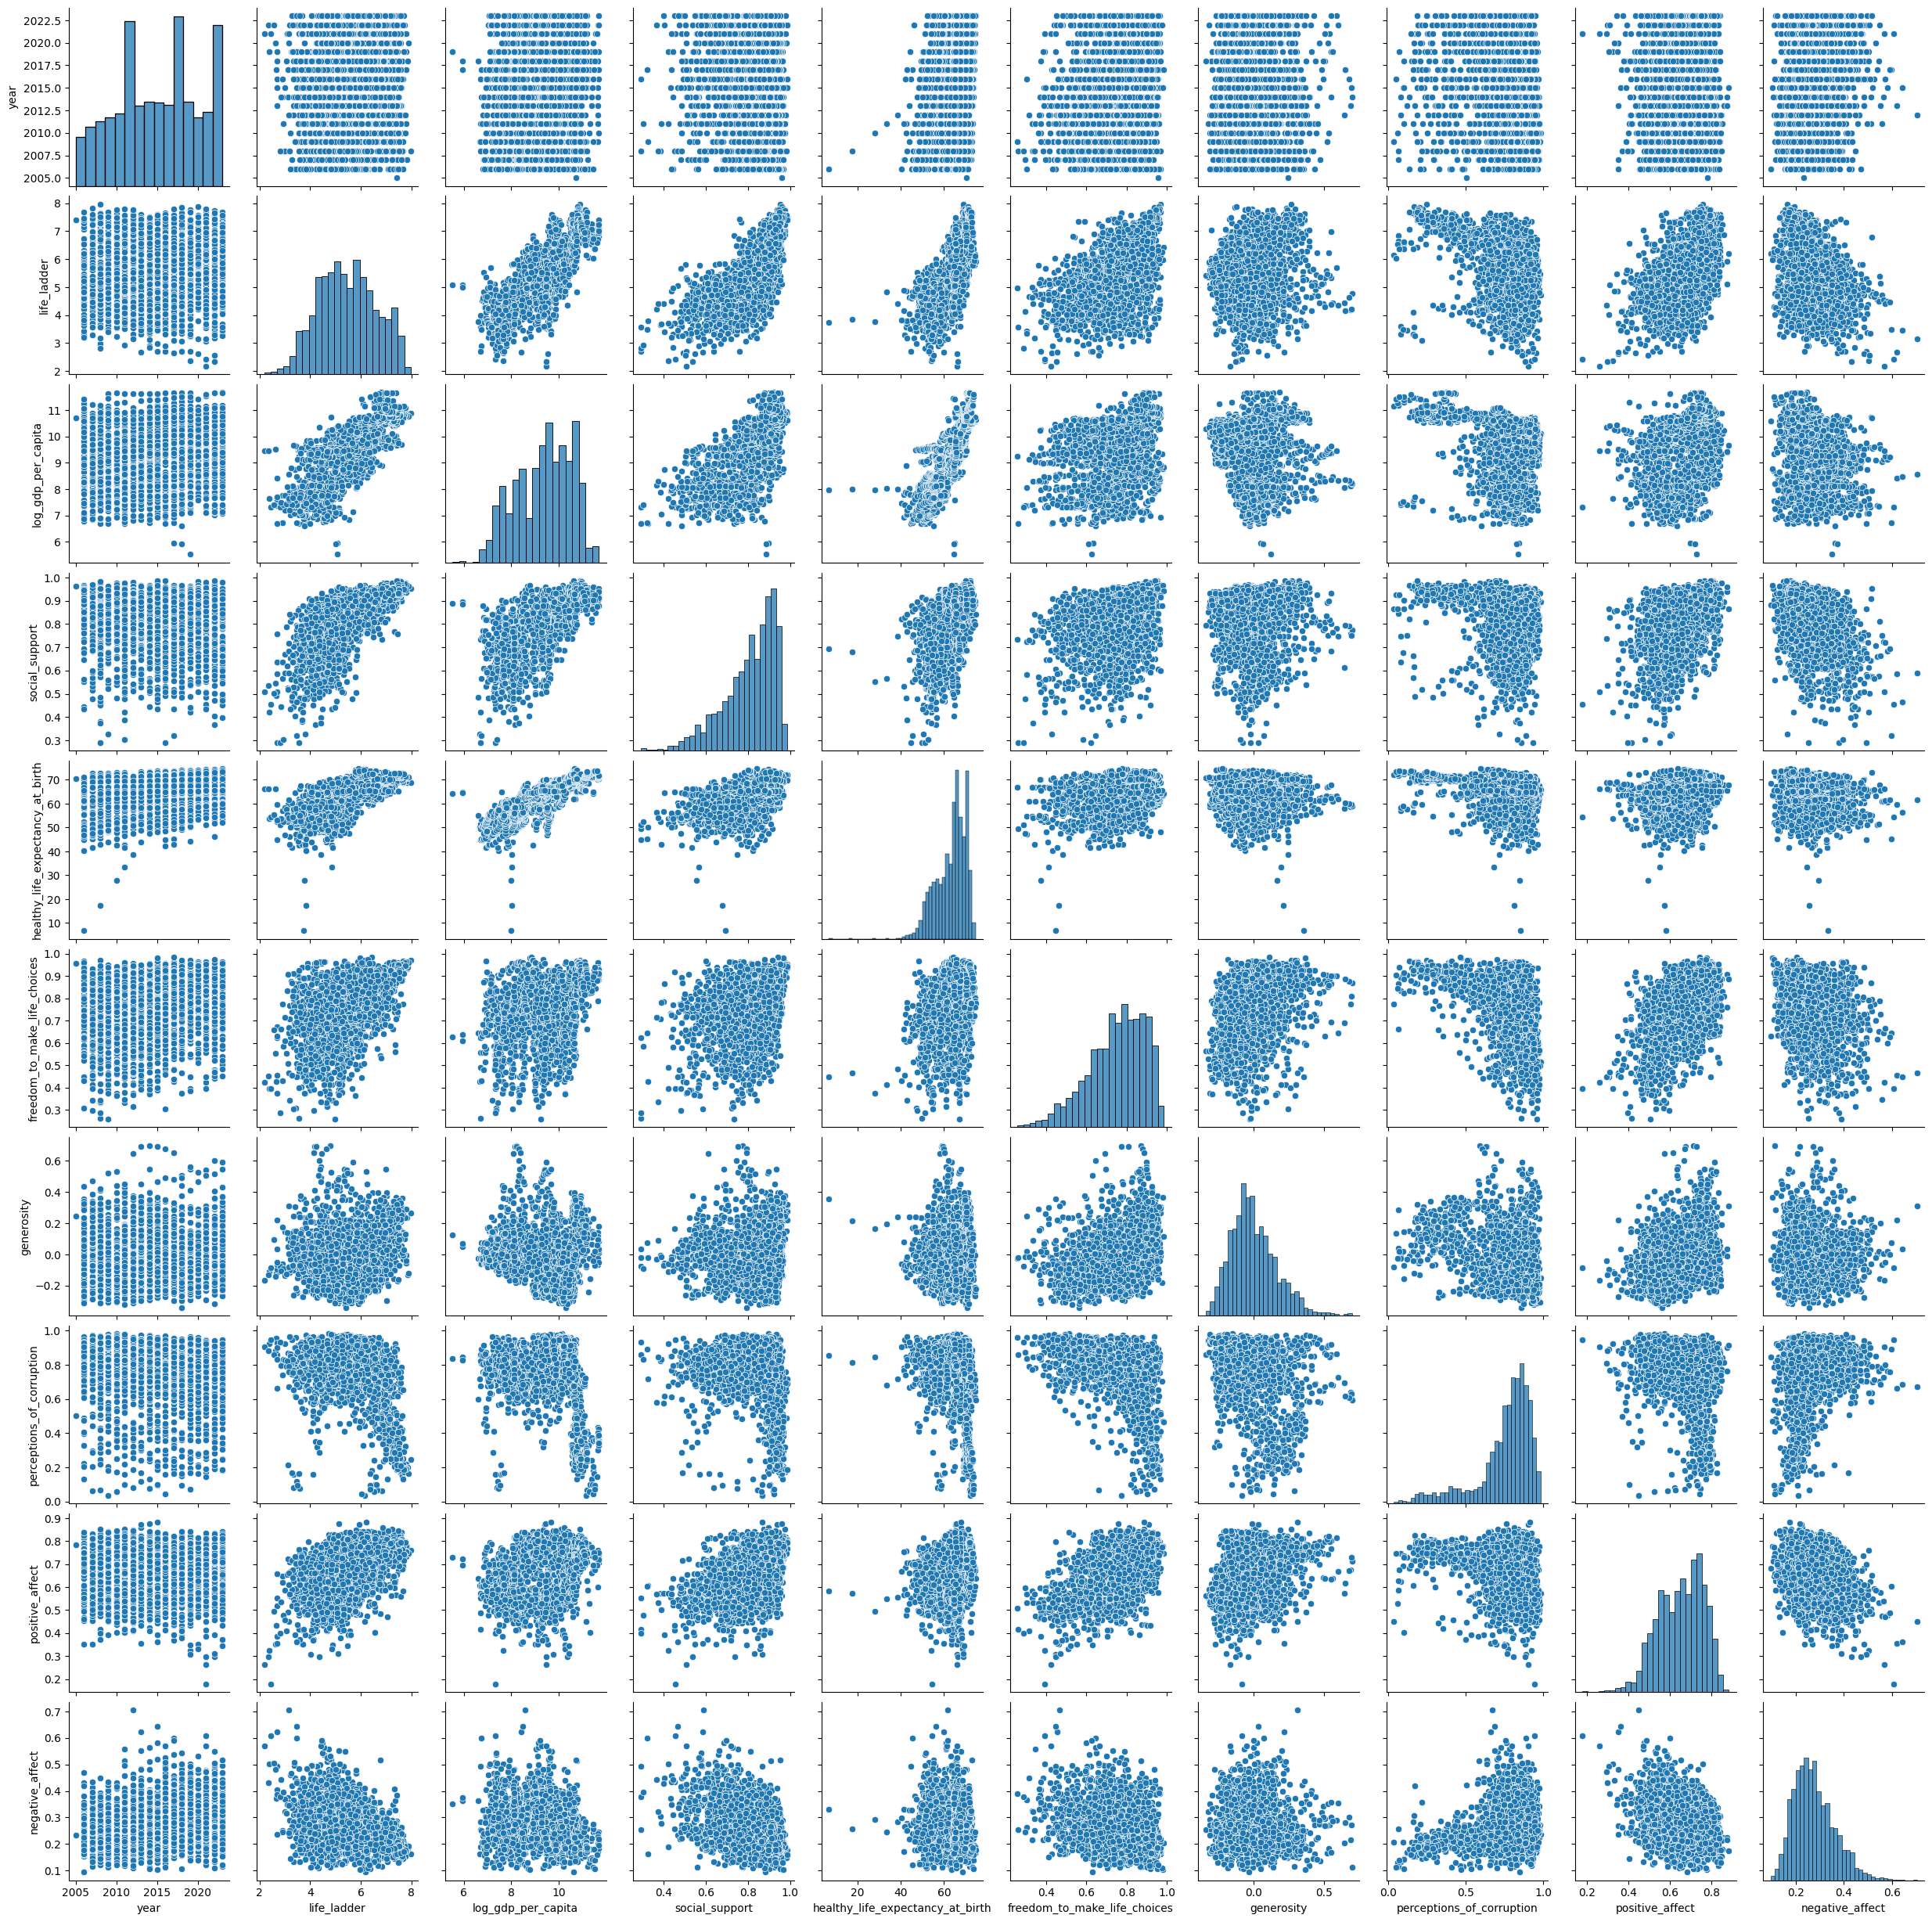

In [3]:
sns.pairplot(df)

Now we have a visualisation of our variables, we can think about which variables will be good candidates for independent-dependent variable pairs. First, we need to question what we would like to predict? 

An obvious pair may be to predict the happiness of the people based on the gdp per capita, maybe we can answer the question of: "Does money really make you happy"? 

"Does an increase in social support lead to a happier life?" 

"Are those that perceive high corruption likely to experience more worry, or anger?"





#### I will use simple linear regression to come to conclusions on all of these questions: 

# 1. GDP per Capita vs Life Ladder

### Define the variables

In [4]:

#NOTE TO SELF: DOUBLE [[]] around independent variable (2D)
X = df[['log_gdp_per_capita']]
y = df['life_ladder']

# Train test split
# Test size = 0.2 (20% of data in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Independent (X) variable: \n{X_train.values}\n")
print(f"Dependent (y) variable: \n{y_train.values}")


Independent (X) variable: 
[[ 8.312]
 [10.698]
 [10.193]
 ...
 [ 7.315]
 [ 6.885]
 [ 8.982]]

Dependent (y) variable: 
[4.884 7.662 5.937 ... 4.019 4.654 4.59 ]


### Create and fit the LR Model

In [5]:
lr = LinearRegression().fit(X_train, y_train)

### View Parameters

In [6]:
b = lr.intercept_
w = lr.coef_
print(f"Model parameters: \nw: {w}, \nb: {b}")

Model parameters: 
w: [0.78123986], 
b: -1.8467938408313067


### Make Predictions

In [7]:
y_test_preds = lr.predict(X_test)

y_pred = np.dot(X_test, w) + b

print(f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()} \n")

print(f"Last four predictions on the test set:\n{y_pred[:4]}\n")
print(f"Target values \n{y_test[:4].values}\n")

mae = metrics.mean_absolute_error(y_test, y_test_preds)
print(f"Mean Absolute Error on the test set: {mae: 2f}")

prediction using np.dot() and predictions using lr.predict are the same: True 

Last four predictions on the test set:
[5.43123666 5.54842263 4.57187281 5.70935804]

Target values 
[5.317 5.695 5.146 7.432]

Mean Absolute Error on the test set:  0.550316


With a mean absolute error of 0.55 this suggests that while the model cannot perfectly predict happiness it does give a decent approximation. 

### Plot the results

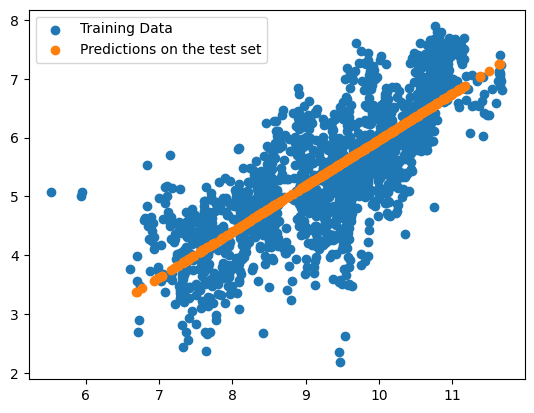

In [8]:
plt.figure()
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_pred, label = 'Predictions on the test set')
plt.legend()

The predictions all lie on a straight line that fits the data best. The data, however, has a lot more variation and is not perfectly explained just by this one line. As there are so many more variables in this dataset, using the other variables to try and explain this variation would be beneficial. This is called Multiple Linear Regression, something I will use on this dataset in the future to improve the results, but for now I am going to apply the same method to the other variables previously mentioned. 

## Social Support vs Life Ladder

In [9]:

#NOTE TO SELF: DOUBLE [[]] around independent variable (2D)
X = df[['social_support']]
y = df['life_ladder']

# Train test split
# Test size = 0.2 (20% of data in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Independent (X) variable: \n{X_train.values}\n")
print(f"Dependent (y) variable: \n{y_train.values}")



Independent (X) variable: 
[[0.655]
 [0.954]
 [0.909]
 ...
 [0.642]
 [0.756]
 [0.744]]

Dependent (y) variable: 
[4.884 7.662 5.937 ... 4.019 4.654 4.59 ]


In [10]:
lr = LinearRegression().fit(X_train, y_train)

In [11]:
b = lr.intercept_
w = lr.coef_
print(f"Model parameters: \nw: {w}, \nb: {b}")

Model parameters: 
w: [6.7079716], 
b: 0.05292547798801106


In [12]:
y_test_preds = lr.predict(X_test)

y_pred = np.dot(X_test, w) + b

print(f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()} \n")

print(f"Last four predictions on the test set:\n{y_pred[:4]}\n")
print(f"Target values \n{y_test[:4].values}\n")

mae = metrics.mean_absolute_error(y_test, y_test_preds)
print(f"Mean Absolute Error on the test set: {mae: 2f}")

prediction using np.dot() and predictions using lr.predict are the same: True 

Last four predictions on the test set:
[5.48638248 5.2918513  4.64117805 6.21084341]

Target values 
[5.317 5.695 5.146 7.432]

Mean Absolute Error on the test set:  0.630182


As we can see in this model the mean absolute error is high at 63%, meaning this model is actually pretty poor at predicting happiness using the social support data. 

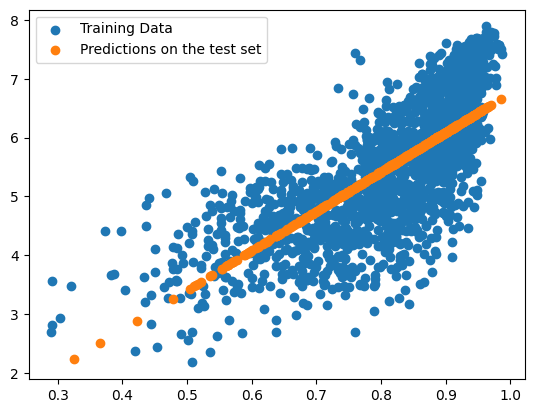

In [13]:
plt.figure()
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_pred, label = 'Predictions on the test set')
plt.legend()

### Corruption vs Negative Affect

In [14]:
#NOTE TO SELF: DOUBLE [[]] around independent variable (2D)
X = df[['perceptions_of_corruption']]
y = df['negative_affect']

# Train test split
# Test size = 0.2 (20% of data in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Independent (X) variable: \n{X_train.values}\n")
print(f"Dependent (y) variable: \n{y_train.values}")

Independent (X) variable: 
[[0.763]
 [0.655]
 [0.915]
 ...
 [0.74 ]
 [0.864]
 [0.91 ]]

Dependent (y) variable: 
[0.382 0.183 0.277 ... 0.345 0.28  0.448]


In [15]:
lr = LinearRegression().fit(X_train, y_train)

In [16]:
b = lr.intercept_
w = lr.coef_
print(f"Model parameters: \nw: {w}, \nb: {b}")

Model parameters: 
w: [0.12164554], 
b: 0.18221831637376756


In [17]:
y_test_preds = lr.predict(X_test)

y_pred = np.dot(X_test, w) + b

print(f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()} \n")

print(f"Last four predictions on the test set:\n{y_pred[:4]}\n")
print(f"Target values \n{y_test[:4].values}\n")

mae = metrics.mean_absolute_error(y_test, y_test_preds)
print(f"Mean Absolute Error on the test set: {mae: 2f}")

prediction using np.dot() and predictions using lr.predict are the same: True 

Last four predictions on the test set:
[0.25982817 0.28756335 0.29060449 0.28196766]

Target values 
[0.255 0.289 0.259 0.24 ]

Mean Absolute Error on the test set:  0.064078


As you can see here we actually have our best model, with a mean absolute error of 6.4% this shows that the model is actually pretty efficient at predicting the negative affect feature. 

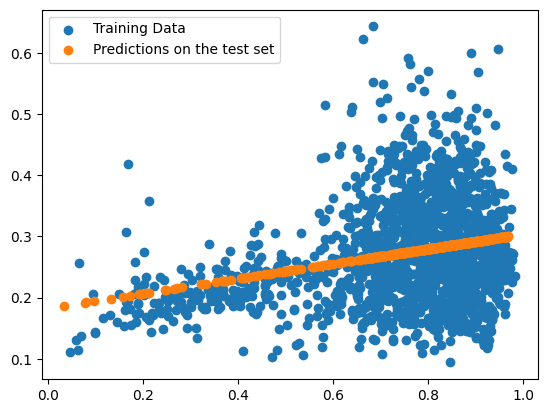

In [18]:
plt.figure()
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_pred, label = 'Predictions on the test set')
plt.legend()

# Conclusion